In [1]:
import sys
sys.path.append('/mnt/c/Users/luukv/Documenten/NatuurSterrkenkundeMasterProject/CodeMP/MasterProject')
from functions import *
from import_data import *

from astropy.constants import R_sun, L_sun, sigma_sb
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

<font color='yellow'>Import stellar parameters</font>

In [2]:
df_MRL = pd.read_csv("../tables/results/ALLPARAMETERS.csv")

In [3]:
df_MRL

,Unnamed: 0,id,ST,ST_ref,ruwe,J,H,K,JHK_ref,JHK_err,...,R_true/RL_fal,R_true/RL_fal_err,RL_q/R_true,RL_q/R_true_err,RL_g/R_true,RL_g/R_true_err,X_rayFlux_SWIFTXRT,SWIFTXRT_range,SWIFT_id,L_x
0,0,SMC X-1,B0Ib,Van der Meer et al. (2007),1.002890,13.445,13.513,13.474,2MASS,0.03,...,0.881368,0.069112,1.131913,0.083178,0.270635,0.030831,992.4,0.3-10.0 keV,J0117.8-7327,4.630355e+39
1,1,LMC X-4,O8III,Van der Meer et al. (2007),1.014480,14.586,14.780,14.750,2MASS,0.03,...,0.883266,0.051559,1.129985,0.064500,0.322619,0.023385,0.0,-,J0532.5-6623A,0.000000e+00
2,2,Vela X-1,B0.5Ib,Barziv et al. (2001),0.880197,5.833,5.705,5.596,2MASS,0.03,...,0.817777,0.030910,1.220872,0.046424,0.333498,0.019397,1759.0,0.3-10.0 keV,NaN,8.165259e+36
3,3,Cen X-3,O6.5III,Van der Meer et al. (2007),1.020704,NaN,NaN,NaN,E(B-V) from van der Meer et al. (2007),0.03,...,0.895804,0.059518,1.081867,0.071252,0.253630,0.023556,3861.0,0.3-10.0 keV,NaN,2.106832e+38
4,4,4U1538-52,B0Ia,Kaper (2001),0.985791,10.358,9.910,9.677,2MASS,0.03,...,1.114923,0.117925,1.036450,0.096116,0.238439,0.037305,271.9,0.3-10.0 keV,NaN,9.970188e+36
5,5,4U1700-37,O6Iaf+,Van der Meer et al. (2005),0.808192,5.744,5.639,5.496,2MASS,0.03,...,0.905723,0.086664,1.019189,0.098348,0.168477,0.025745,1157.0,0.3-10.0 keV,NaN,3.173825e+36
6,6,XTE J1855-026,B0Iaep,Falenga et al. (2015),NaN,10.564,10.089,9.799,2MASS,0.03,...,0.873016,0.092214,1.106623,0.107565,0.264364,0.039624,218.7,0.3-10.0 keV,NaN,1.428142e+37


<font color='yellow'> Lines of constant radius in HRD <font>

In [4]:
def L(Teff, R):
    # Some constants
    sigma = 5.67e-8 # W m-2 k-4
    Rsun = 696340000 # m
    Lsun = 3.86e26 # W

    return np.log10((4 * np.pi * sigma * Rsun**2) / Lsun) + 2 * np.log10(R) + 4 * np.log10(Teff)

radii = [0.01, 1, 100] # Solar radii
T_cR = [10**3, 10**5]
log_T_cR = [3, 5]
L_cR = []

for R in radii:
    save = []
    for T in T_cR:
        save.append(L(T, R))
    L_cR.append(save)

<font color='red' size=5> SET THE METALLICITY </font>

In [5]:
# Set the metallicity value
ZY_values = [(0.02, 0.284), (0.03, 0.302), (0.04, 0.321)]
Z = ZY_values[0][0]
Y = ZY_values[0][1]

<font color='yellow'> Calculate the location of the Zero Age Main-Sequence in the HRD </font>

In [6]:
L_ZAMS, T_ZAMS = ZAMS(Z=Z, Y=Y)

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/ext

<font color='yellow' size=5> Plot some evolutionary tracks</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


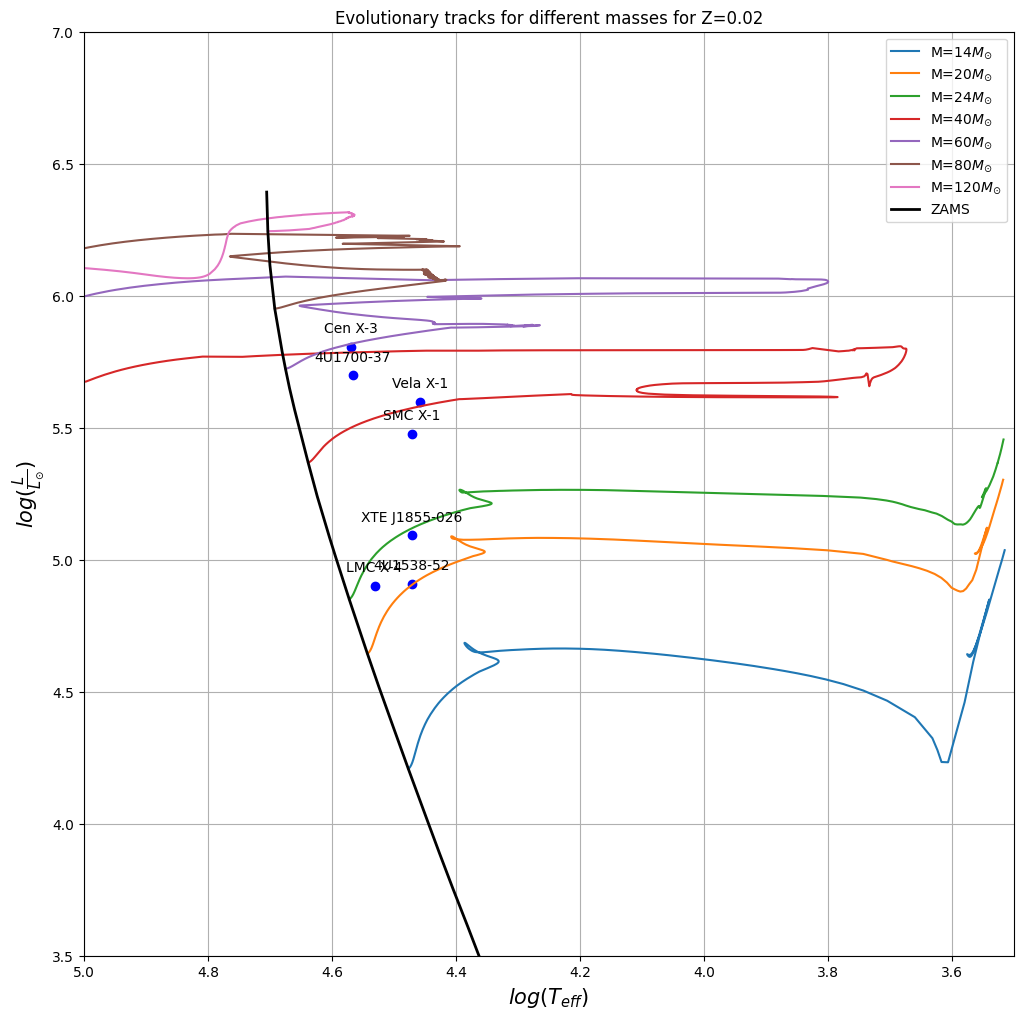

In [7]:
M_values = [14, 20, 24, 40, 60, 80, 120]
M_values = ['{:07.3f}'.format(m) for m in M_values]

plt.figure(figsize=(12,12))
for M in M_values:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'))

for i, label in enumerate(df_MRL["id"].tolist()):
    plt.annotate(label, (df_MRL["logTeff"].tolist()[i], df_MRL["logL_true/L_sun"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2)
plt.scatter(df_MRL['logTeff'], df_MRL['logL_true/L_sun'], color='blue')
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(3.5, 7)
plt.xlim(3.5, 5)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow' size=5> Determine masses

<font color='yellow'> Vela X-1 </font>

In [8]:
df_MRL.columns

Index(['Unnamed: 0', 'id', 'ST', 'ST_ref', 'ruwe', 'J', 'H', 'K', 'JHK_ref',
       'JHK_err', 'semi_eclipse_angle', 'semi_eclipse_angle _err', 'a',
       'a_err', 'i', 'i_err', 'Mopt', 'Mopt_err', 'Ropt', 'Ropt_err',
       'P_orbit', 'P_spin', 'RL/a', 'RL/a_err', 'Mx', 'Mx_err', 'source_id',
       'ra', 'ra_error', 'dec_error', 'dec', 'r_med_geo', 'r_lo_geo',
       'r_hi_geo', 'r_med_photogeo', 'r_lo_photogeo', 'r_hi_photogeo', 'flag',
       'L_true', 'L_true_err_low', 'L_true_err_high', 'logL_true/L_sun',
       'logL_true/L_sun_err_high', 'logL_true/L_sun_err_low', 'Teff',
       'Teff_err', 'logTeff', 'logTeff_err', 'L_ST', 'L_ST_err', 'R_true',
       'R_true_err', 'R_expected', 'R_expected_err_high', 'R_expected_err_low',
       'R_ST', 'R_ST_err', 'R_expected/R_true', 'R_expected/R_true_err_high',
       'R_expected/R_true_err_low', 'M_exp', 'M_HRD', 'M_exp_err',
       'M_opt/M_exp', 'M_ST', 'M_ST_err', 'M_opt/M_exp_err', 'Kx', 'Kopt', 'q',
       'Ohmega', 'Mns', 'Kx_err'

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


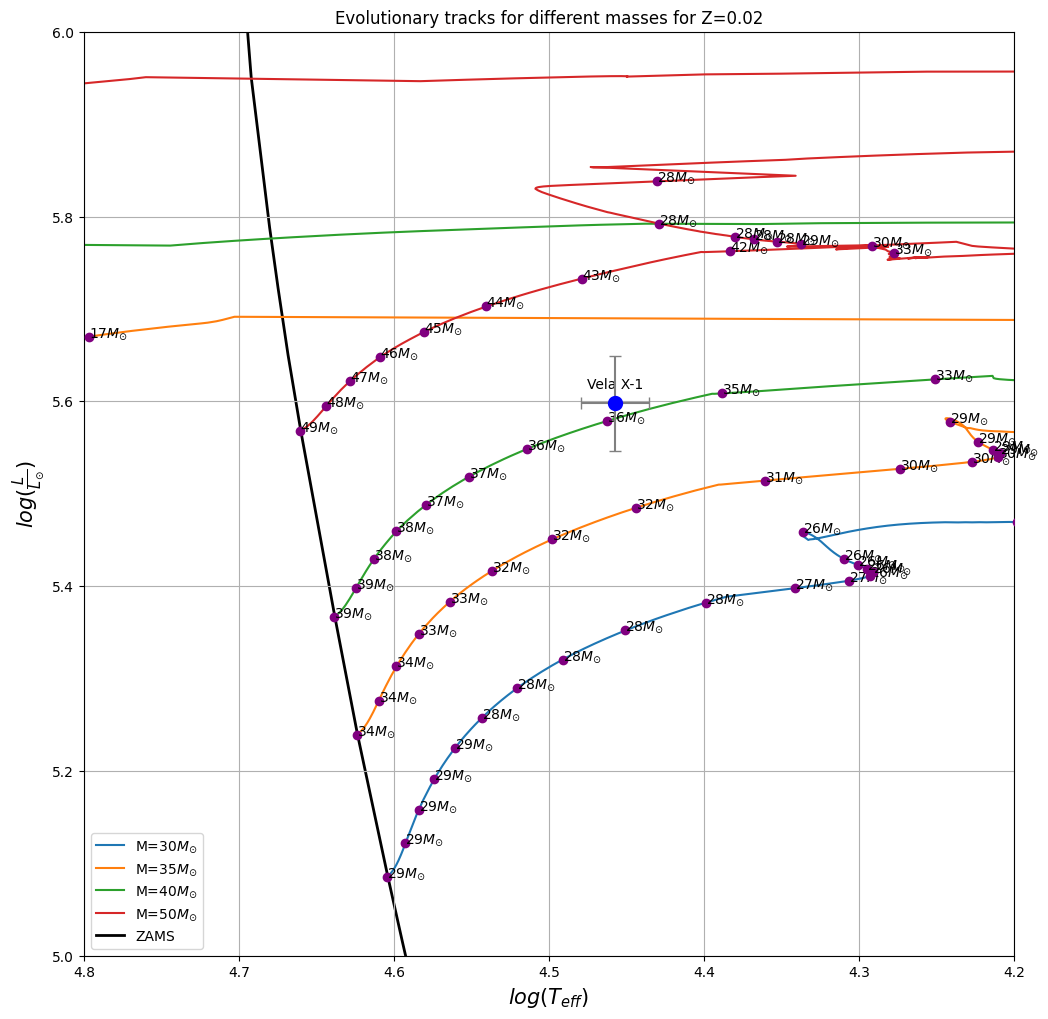

In [9]:
# Object
id = 'Vela X-1'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [30, 35, 40, 50]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>Cen X-3</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


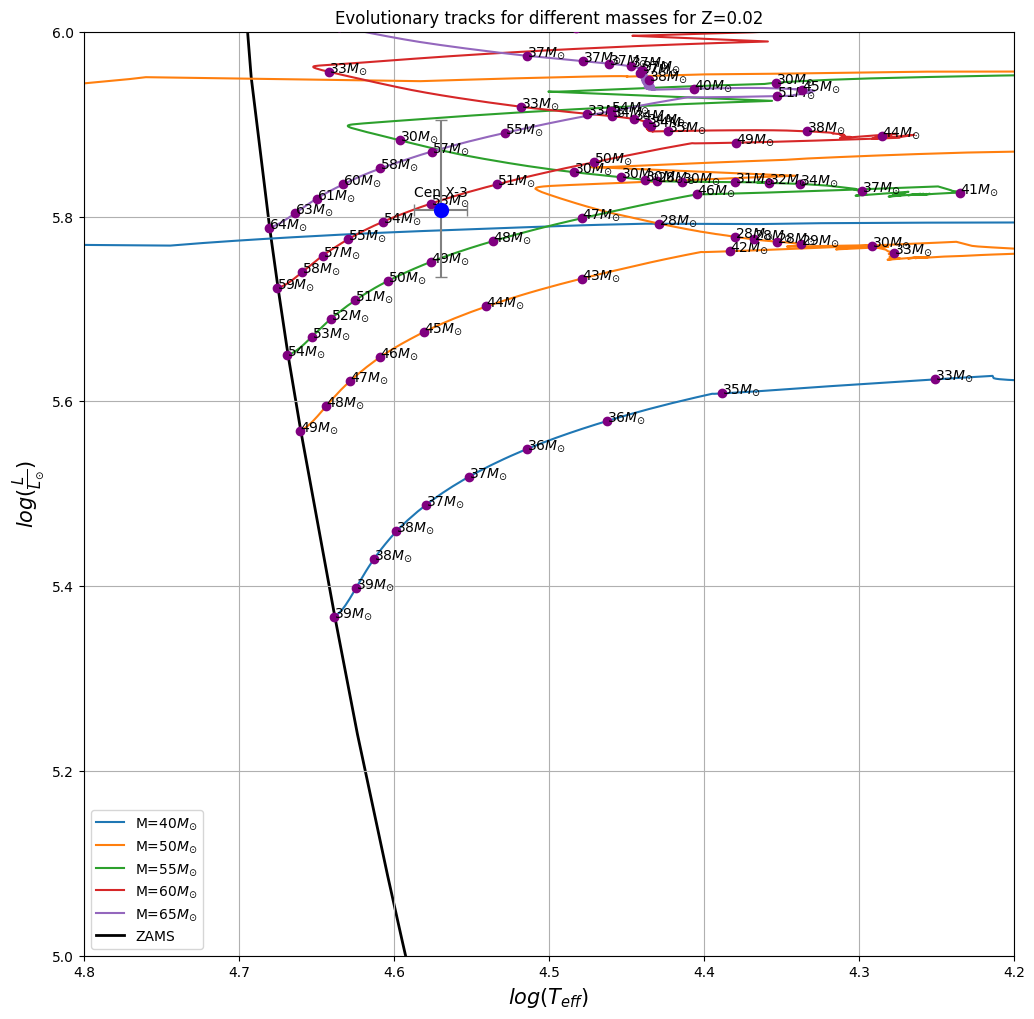

In [10]:
# Object
id = 'Cen X-3'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [40, 50, 55, 60, 65]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>SMC X-1</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


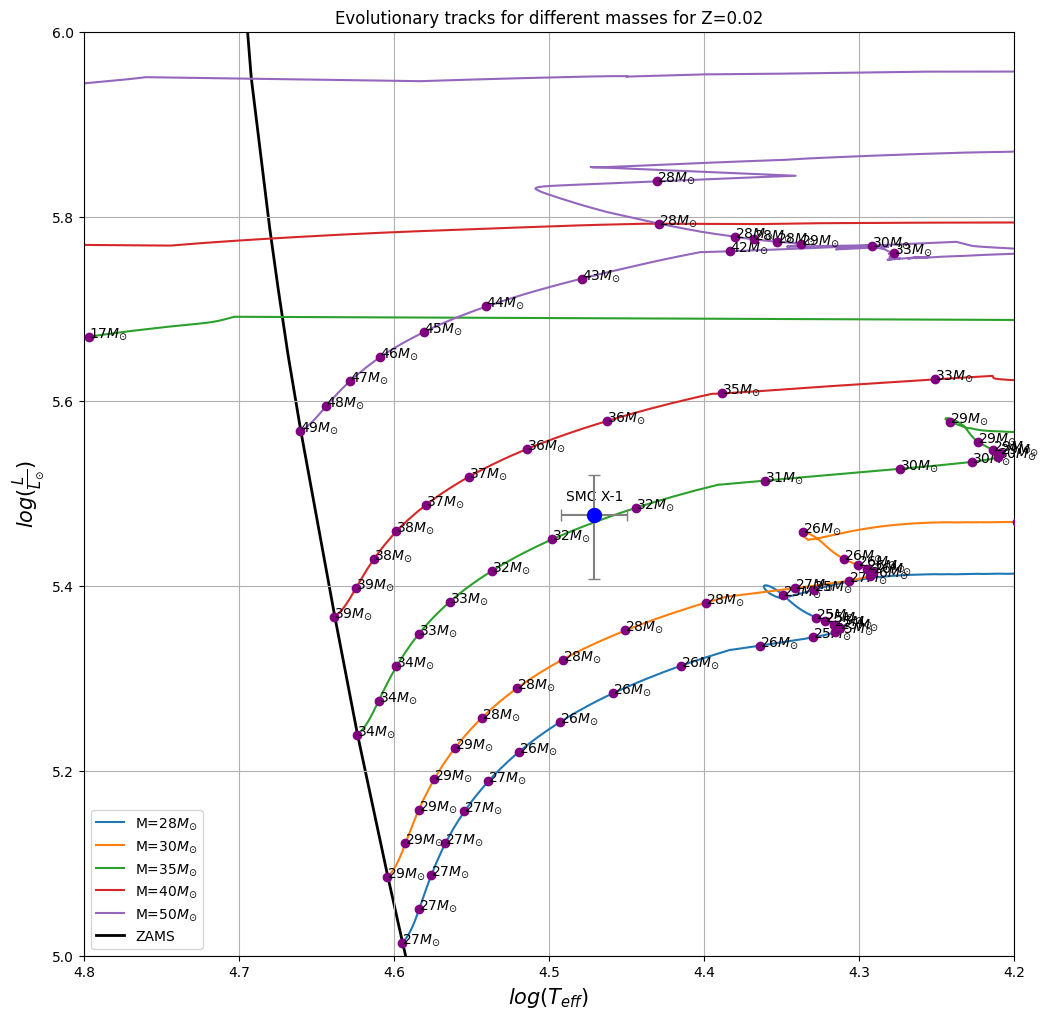

In [11]:
# Object
id = 'SMC X-1'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [28, 30, 35, 40, 50]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'> LMC X-4 </font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


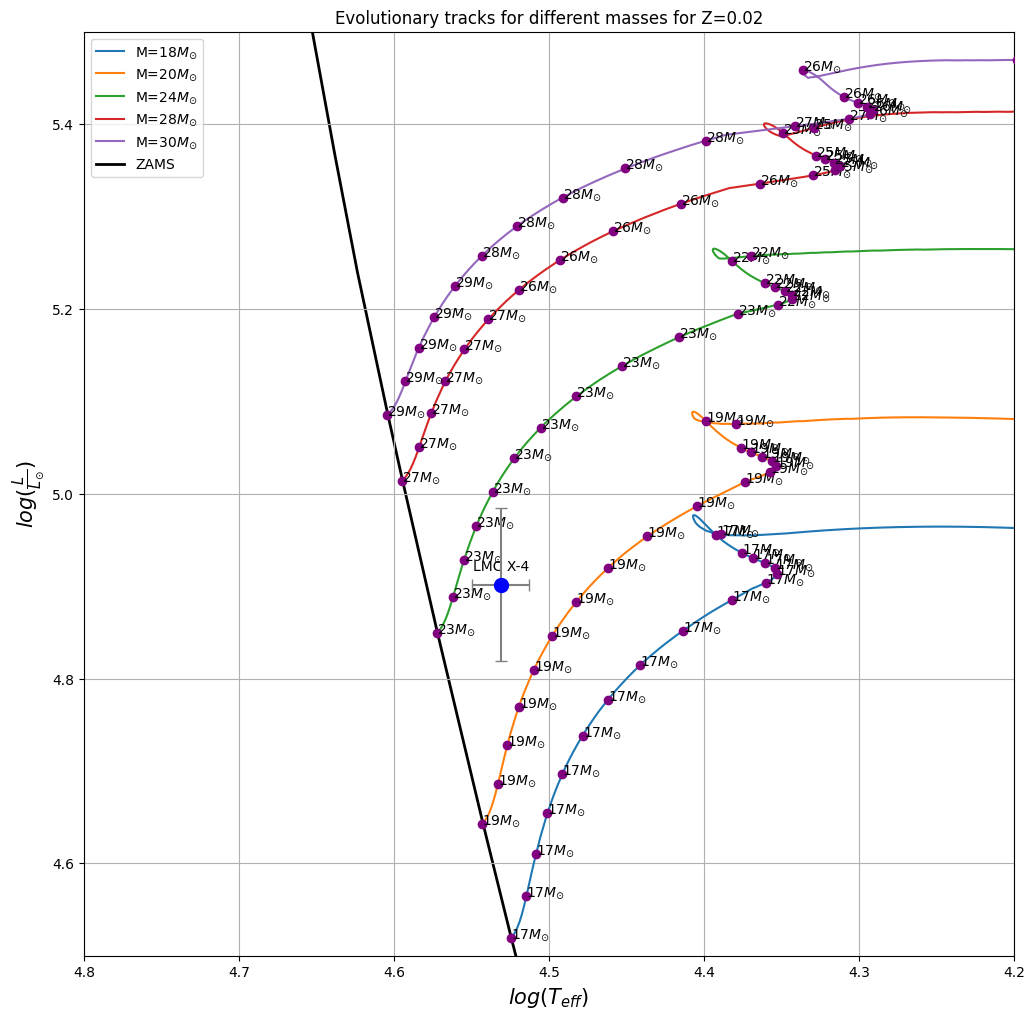

In [12]:
# Object
id = 'LMC X-4'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [18, 20, 24, 28, 30]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(4.5, 5.5)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>4U1538-52</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


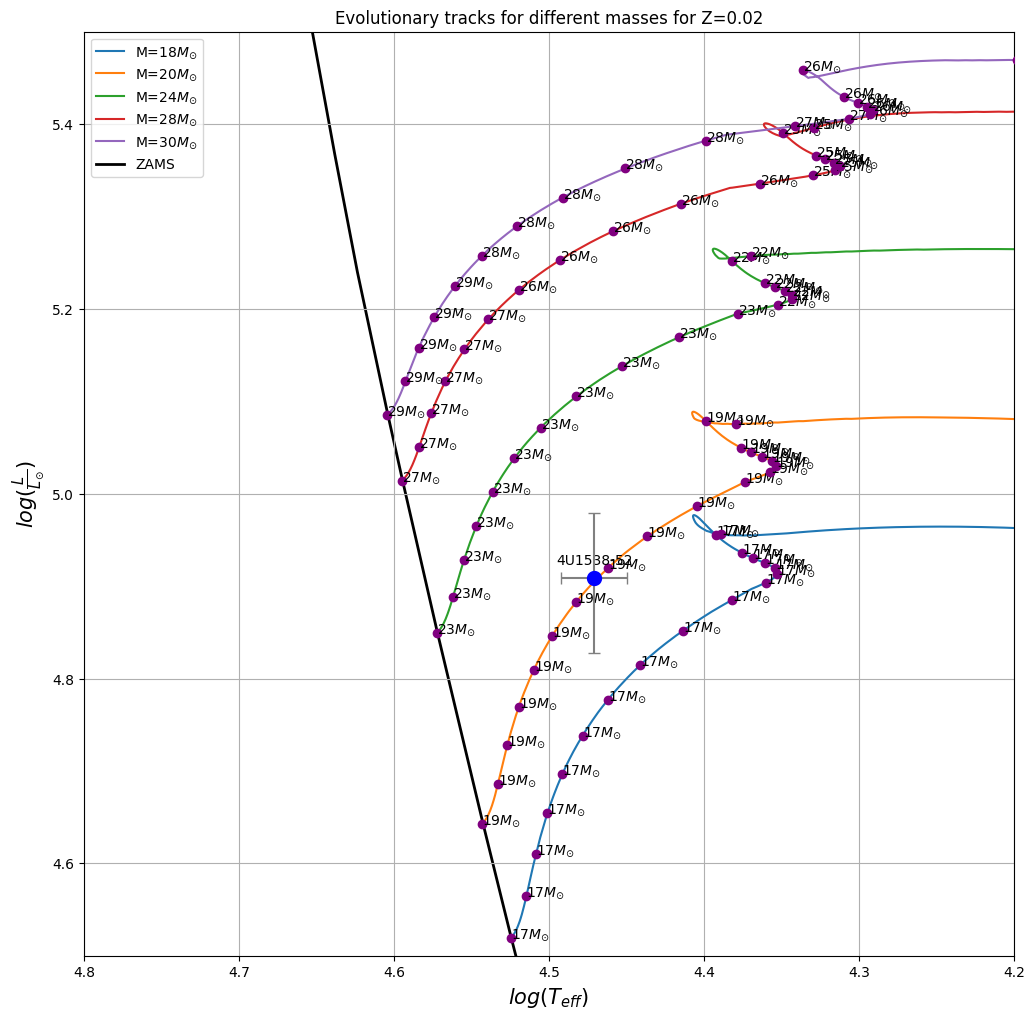

In [13]:
# Object
id = '4U1538-52'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [18, 20, 24, 28, 30]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(4.5, 5.5)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>4U1700-37</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


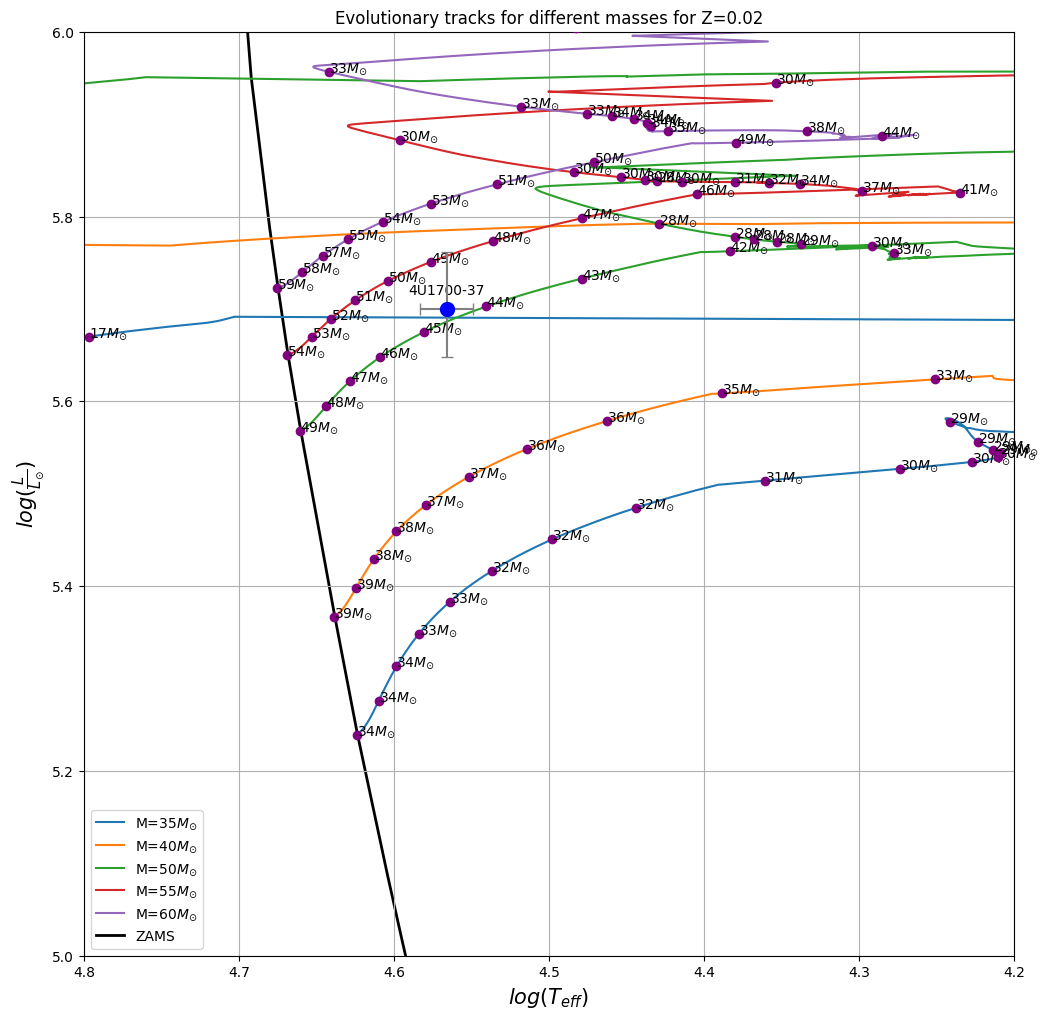

In [14]:
# Object
id = '4U1700-37'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [35, 40, 50, 55, 60]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>XTE J1855-026</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


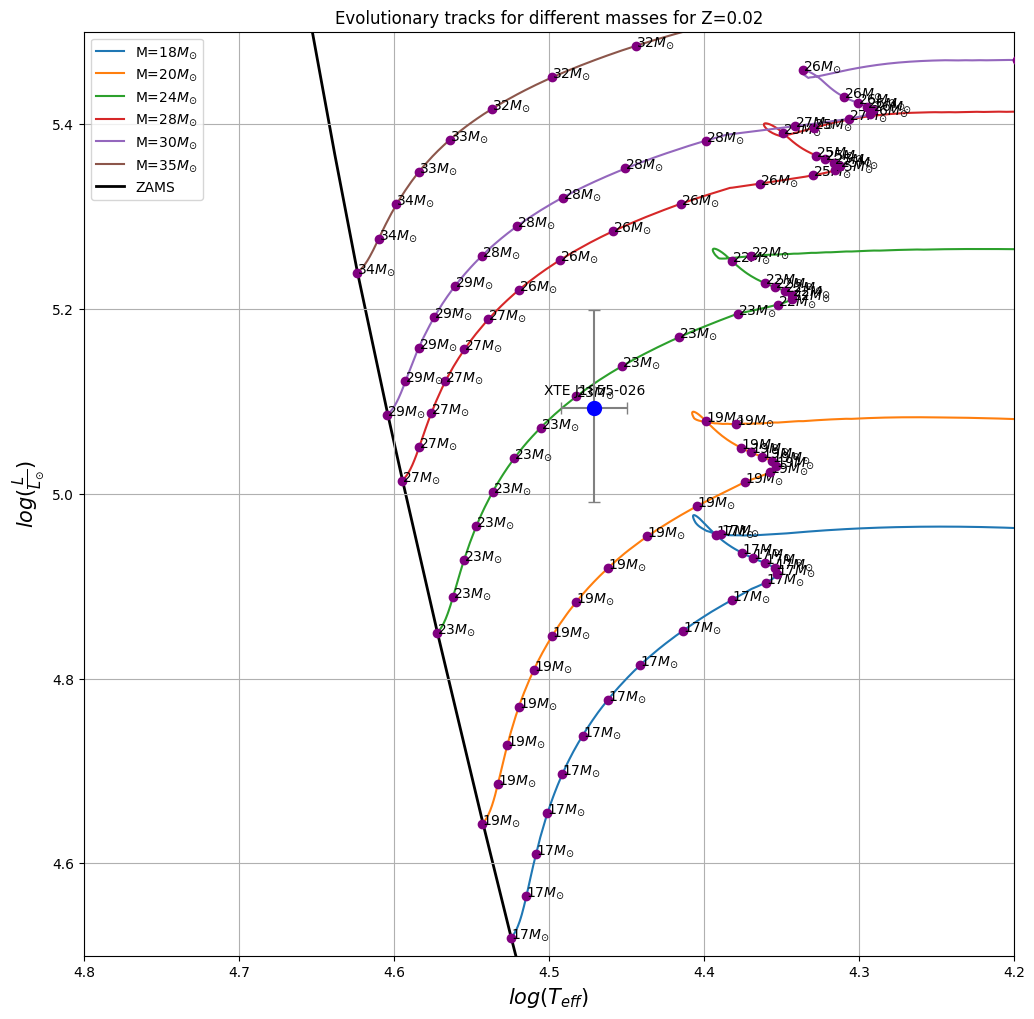

In [15]:
# Object
id = 'XTE J1855-026'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = [[df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_low'].reset_index(drop=True).at[0]], [df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err_high'].reset_index(drop=True).at[0]]]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [18, 20, 24, 28, 30, 35]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=logL_err_obj, xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(4.5, 5.5)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()